# Análsis y descripción de los datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat

In [ ]:
data_ex = pd.read_csv("data/NASA_Exoplanet_Archive.csv")

In [4]:
data_ex.columns

Index(['loc_rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name',
       'tic_id', 'gaia_id', 'sy_snum', 'sy_pnum',
       ...
       'sy_icmag', 'sy_tmag', 'sy_kepmag', 'pl_nnotes', 'st_nphot', 'st_nrvc',
       'st_nspec', 'pl_nespec', 'pl_ntranspec', 'pl_ndispec'],
      dtype='object', length=108)

# Columnas seleccionadas:
1. pl_name: Nombre común del planeta
2. hostname: Nombre común del sistema estelar
3. sy_snum: Número de estrellas en el sistema planetario
4. sy_pnum: Número de planetas confirmados en el sistema planetario
5. sy_mnum: Número de lunas en el sistema planetario
6. cb_flag: El planeta orbita en un sistema binario (1=si, 0=no)
7. disc_year: Año del descubrimiento del planeta
8. pl_orbper: Días que tarda el planeta en dar una vuelta completa alrededor de su estrella o sistema
9. pl_rade: Radio del planeta medida en unidades de radio del planeta tierra
10. pl_dens: Densidad del paleneta en g/cm**3
11. st_age: Edad de la estrella en Gyr


Extraemos las columnas seleccionadas en el apartado anterior para nuestro estudio.

In [5]:
select_columns=["pl_name",
                "hostname",
                "sy_snum",
                "sy_pnum",
                "sy_mnum",
                "cb_flag",
                "disc_year",
                "pl_orbper",
                "pl_rade",
                "pl_dens",
                "st_age"]
data_final=data_ex[select_columns]
data_final.head()

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,pl_orbper,pl_rade,pl_dens,st_age
0,11 Com b,11 Com,2,1,0,0,2007,323.21000,12.2,14.90,NaN
1,11 UMi b,11 UMi,1,1,0,0,2009,516.21997,12.3,13.80,1.56
2,14 And b,14 And,1,1,0,0,2008,186.76000,13.1,2.76,4.50
3,14 Her b,14 Her,1,2,0,0,2002,1765.03890,12.6,7.03,3.90
4,16 Cyg B b,16 Cyg B,3,1,0,0,1996,798.50000,13.5,1.26,7.40


In [6]:
data_final.tail()

,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,pl_orbper,pl_rade,pl_dens,st_age
5825,ups And b,ups And,2,3,0,0,1996,4.617033,14.0,0.438,5.0
5826,ups And c,ups And,2,3,0,0,1999,241.258000,12.3,13.100,5.0
5827,ups And d,ups And,2,3,0,0,1999,1276.460000,12.5,9.170,5.0
5828,ups Leo b,ups Leo,1,1,0,0,2021,385.200000,14.2,0.311,NaN
5829,xi Aql b,xi Aql,1,1,0,0,2007,136.970000,13.4,1.410,7.1


In [7]:
data_final.pl_orbper.describe().apply(lambda x: format(x, '.2f'))

count         5547.00
mean         77117.83
std        5400075.37
min              0.09
25%              4.39
50%             11.28
75%             39.97
max      402000000.00
Name: pl_orbper, dtype: object

In [8]:
data_final.isna().sum()

pl_name         0
hostname        0
sy_snum         0
sy_pnum         0
sy_mnum         0
cb_flag         0
disc_year       0
pl_orbper     283
pl_rade        21
pl_dens       110
st_age       1218
dtype: int64

In [9]:
len(data_final.pl_name.unique())

5830

In [10]:
len(data_final.hostname.unique())

4357

In [11]:
disc_per_year=data_final.groupby("disc_year")["pl_name"].count()

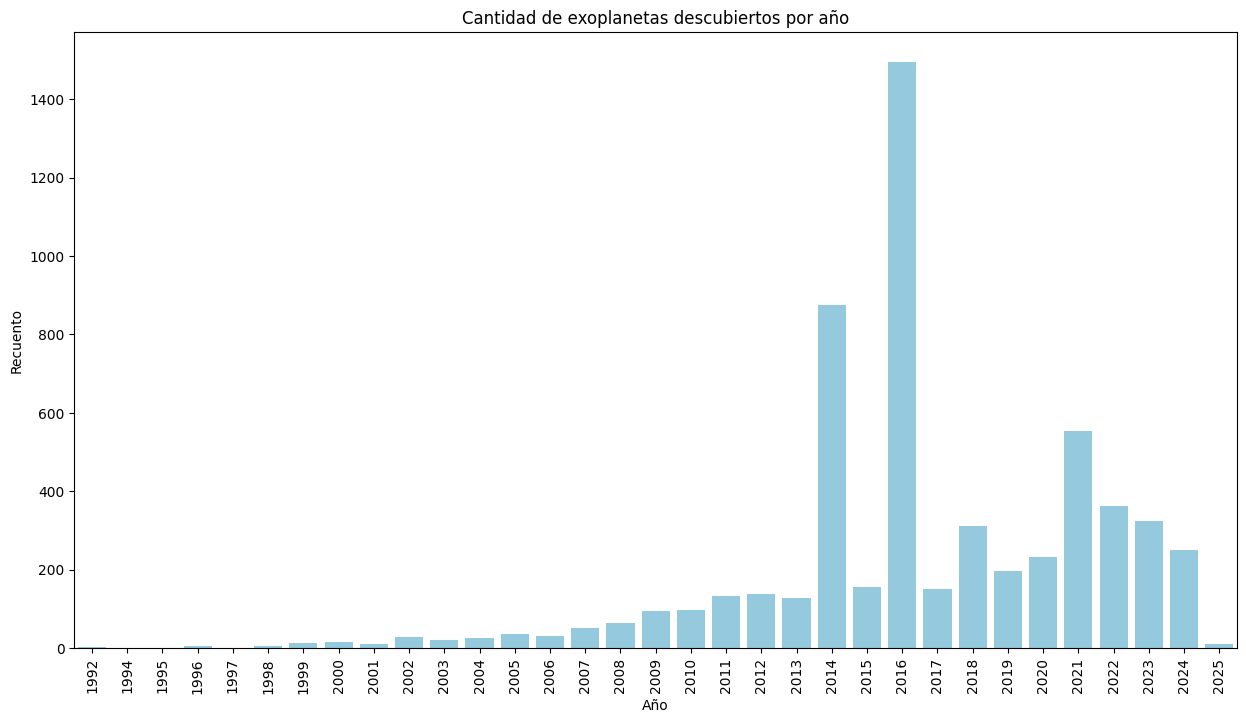

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x = disc_per_year.index, 
                 y = disc_per_year.values, 
                 color="skyblue")

ax.set_xlabel('Año')
ax.set_ylabel('Recuento')
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.set_title('Cantidad de exoplanetas descubiertos por año')
fig.savefig('Cantidad de exoplanetas descubiertos por año.png')

In [30]:
planet_per_host=data_final.groupby("sy_pnum")["hostname"].nunique().reset_index()
print(planet_per_host)

planet_per_host.columns = ["sy_pnum", "unique_hostnames"]

fig=px.bar(planet_per_host, x="sy_pnum",y="unique_hostnames",
           labels={"sy_pnum":"Número de planetas","hostname":"Hostnames Únicos"},
           title="Número de planetas por Hostname")
fig.show()


   sy_pnum  hostname
0        1      3375
1        2       652
2        3       212
3        4        76
4        5        29
5        6        11
6        7         1
7        8         1
